#ЛР №6

Основные понятия ООП. Инкапсуляция. Классы. Декораторы.

##Основная задача "Эксперимент"

Нужно написать класс "Эксперимент", который производит работу с данными.

Вы получили данные в виде словаря. Словарь имеет следующую структуру {'date': '2023-01-05', 'signal': 'path_to_ecg_signal', 'parameters':{}}

**Интерфейс**

Нужно написать класс, где должны поддерживаться следующие методы:

* _конструктор_ — принимает словарь и создает соответствующие поля (self.data, self.path_signal, self.parameters)
* `get_datе()` — возвращает дату записи сигнала.
* `get_signal_length()` — возвращает длину сигнала.
* `plot_signal()` — выводит график сигнала.
* `_signal_filtration(signal, filtration_parametres)` — производит фильтрацию сигнала.
* `_signal_find_peaks(signal, find_peaks_parametres)` — находит точки максимума сигнала и возвращает их в виде списка.
* `_calculate_RR_intervals()` — производит расчет длительности RR интервалов и возвращает длины RR интервалов в виде списка.
В этом методе вызываются методы _signal_filtration и _signal_find_peak.
* `get_RR_statistics()` — возвращает статистические характеристики RR интервалов на записи ECG - среднее, std, min, max (в виде словаря).
В этом методе вызывается метод _calculate_RR_intervals.


*можно добавить свои методы






Подгружаем библиотеки:

In [1]:
!pip install heartpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.3 MB/s eta 0:00:00


In [2]:
!pip install wfdb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 2.9 MB/s eta 0:00:00


In [3]:
#модули, которые нам понадобятся
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import wfdb
import heartpy as hp
from scipy.signal import find_peaks

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


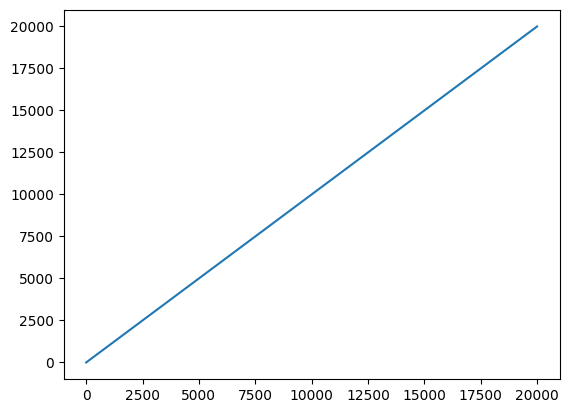

,",MLII"
0,0.995
1,1.995
2,2.995
3,3.995
4,4.995


In [5]:
#загрузка сигнала из .csv файла с pandas
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Python-BMT-main/Python-BMT-main/Seminar6/ecg.csv',
    header = 'infer', sep=';', decimal = ',')
plt.plot(df[',MLII'])
plt.show()
df.head()

Данные успешно подгружаются

Примеры использования функций для обработки сигнала:

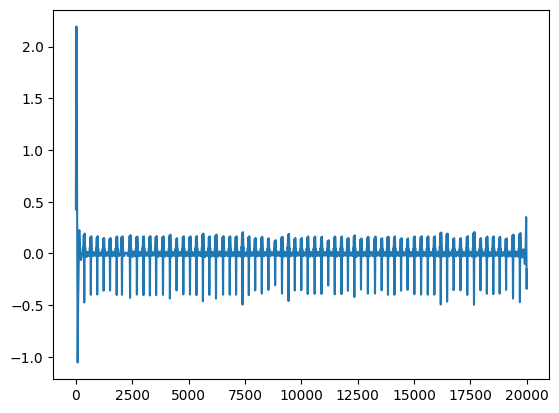

In [6]:
#фильтрация сигнала с библиотекой heartpy
filtered = hp.filter_signal(df[',MLII'], cutoff = [0.75, 3.5], sample_rate = 100, order = 3, filtertype='bandpass')
plt.plot(filtered)
plt.show()

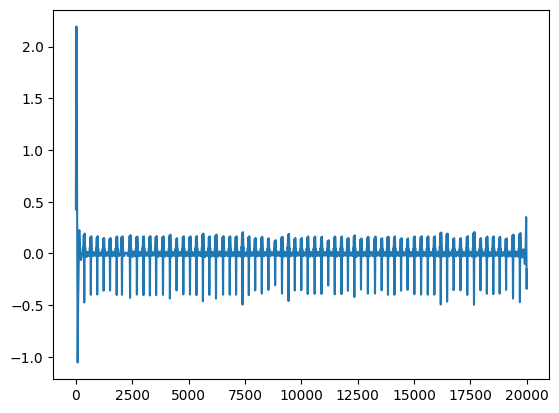

In [7]:
#поиск точек максимума с библиотекой scipy
peaks, _ = find_peaks(filtered, height=20)
plt.plot(filtered)
plt.plot(peaks, filtered[peaks])
plt.show()

Описание Класса

In [67]:
class Experiment:
  def __init__(self, data):
    self.data = data['date']
    self.path_signal = data['signal']
    self.parameters = data['parameters']
  def get_date(self):
    return self.data


  def get_signal_length(self):
    df=pd.read_csv(self.path_signal)
    return len (df)

  def plot_signal(self):
    df = pd.read_csv(self.path_signal)
    plt.plot(df['MLII'])
    plt.show()

  def _signal_filtration(self, signal, **filtration_parametres):
    filtered = hp.filter_signal(signal, **filtration_parametres)
    return filtered


  def _signal_find_peaks(self, filtered, **find_peaks_parametres):
    peaks, _ = find_peaks(filtered, **find_peaks_parametres)
    plt.plot(filtered)
    plt.plot(peaks, filtered[peaks])
    plt.show()
    return peaks.tolist()


  def _calculate_RR_intervals(self):
    df = pd.read_csv(self.path_signal)
    filtered = self._signal_filtration(df['MLII'], **self.parameters['filtration_parametres'])
    peaks = self._signal_find_peaks(filtered, **self.parameters['find_peaks_parametres'])
    new_array = []
    for i in range(len(peaks)-1):
      new_array.append(peaks[i+1]-peaks[i])

    return new_array

  def get_RR_statistics(self):
    RRs = self._calculate_RR_intervals()
    RR_statistics = {}
    RR_statistics['mean'] = np.mean(RRs)
    RR_statistics['std'] = np.std(RRs)
    RR_statistics['min'] = np.min(RRs)
    RR_statistics['min'] = np.max(RRs)
    return RR_statistics



Файл с ЭКГ сигналом (ecg.csv) в папке

Теперь используем его для создания класса Experiment:

In [68]:
experiment = Experiment(
    {'date': '2023-01-05',
      'signal': '/content/gdrive/MyDrive/Colab Notebooks/Python-BMT-main/Python-BMT-main/Seminar6/ecg.csv',
      'parameters': {'filtration_parametres': {'cutoff': [0.75, 3.5],
                                               'sample_rate': 100,
                                               'order': 3,
                                               'filtertype': 'bandpass'},
                     'find_peaks_parametres': {'height': 20}
                     }
    }
)


In [61]:
print(experiment.get_date())

2023-01-05


In [62]:
print(experiment.get_signal_length())

20000


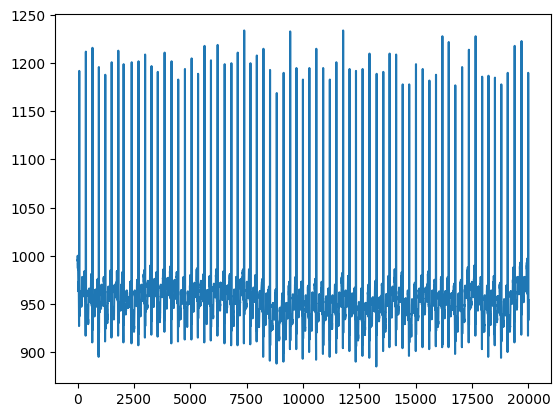

None


In [63]:
print(experiment.plot_signal())

In [69]:
print(experiment._signal_filtration(df[',MLII'], cutoff = [0.75, 3.5], sample_rate = 100, order = 3, filtertype='bandpass'))

[ 0.42537046  0.62337197  0.80000364 ... -0.22265981 -0.18906577
 -0.15507731]


In [70]:
print(experiment._signal_find_peaks())

TypeError: Experiment._signal_find_peaks() missing 1 required positional argument: 'filtered'

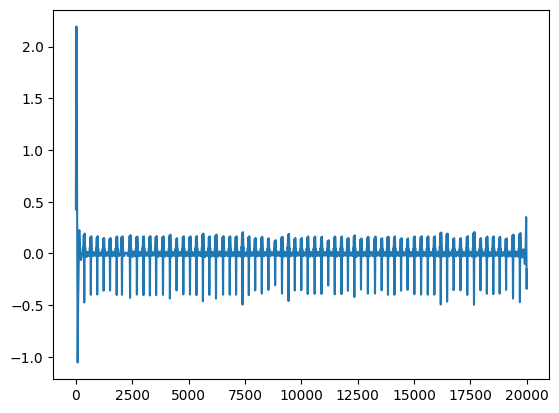

[]


In [66]:
print(experiment._calculate_RR_intervals())

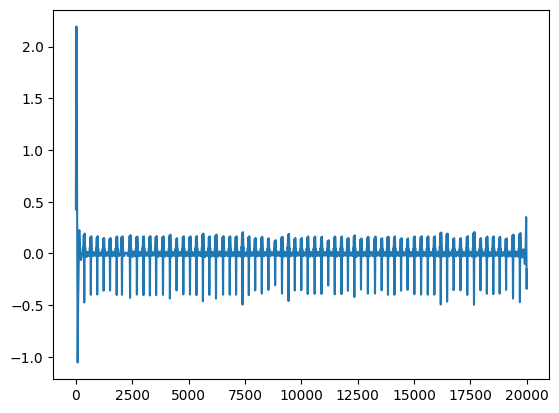

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


ValueError: zero-size array to reduction operation minimum which has no identity

In [60]:
print(experiment.get_RR_statistics())

##Задача ** "Минигольф"

 в папке на githab